In [22]:
import pandas as pd
import sqlalchemy
import plotly.express as px
import matplotlib.pyplot as plt
from datetime import datetime

# Deutsche Bahn Data

# Weather Data

## Exploration

In [23]:
weather_df = pd.read_sql("select * from raw_weather_data", "sqlite:///data.sqlite", )
weather_df

,STATIONS_ID,MESS_DATUM,QN_3,FX,FM,QN_4,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK,eor
0,5715,20211208,10,17.0,4.8,3,0.0,0,-999.0,0,7.0,6.5,991.56,3.4,83.71,-999.0,-999.0,-999.0,eor
1,5715,20211209,10,5.7,2.1,3,0.0,0,-999.0,0,7.5,6.8,995.36,3.4,92.13,-999.0,-999.0,-999.0,eor
2,5715,20211210,10,6.7,3.0,3,0.0,0,-999.0,0,-999.0,6.3,989.43,2.6,86.13,-999.0,-999.0,-999.0,eor
3,5715,20211211,10,9.3,2.6,3,0.0,0,-999.0,-999,-999.0,6.0,1005.06,0.8,92.35,-999.0,-999.0,-999.0,eor
4,5715,20211212,10,9.8,4.5,3,2.0,4,-999.0,-999,-999.0,8.7,1012.63,5.5,93.83,-999.0,-999.0,-999.0,eor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308122,2429,20230606,1,6.8,1.9,1,0.0,0,-999.0,-999,0.0,12.2,1018.30,15.3,72.25,22.5,7.9,3.1,eor
308123,2429,20230607,1,6.1,1.9,1,0.0,0,-999.0,-999,2.0,11.7,1017.64,14.3,74.39,-999.0,-999.0,-999.0,eor
308124,2429,20230608,1,5.9,1.8,1,0.0,0,-999.0,-999,2.4,11.8,1015.72,16.3,67.13,24.7,9.1,7.4,eor
308125,2429,20230609,1,7.9,2.1,1,0.0,0,-999.0,-999,3.0,11.6,1015.38,18.5,60.50,27.9,8.0,4.1,eor


[Data description](https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/daily/kl/recent/DESCRIPTION_obsgermany_climate_daily_kl_recent_en.pdf)

![Table](data/weather_data/Screenshot%20from%202023-06-11%2013-08-02.png)

In [24]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308127 entries, 0 to 308126
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STATIONS_ID  308127 non-null  int64  
 1   MESS_DATUM   308127 non-null  int64  
 2   QN_3         308127 non-null  int64  
 3     FX         308127 non-null  float64
 4     FM         308127 non-null  float64
 5   QN_4         308127 non-null  int64  
 6    RSK         308127 non-null  float64
 7   RSKF         308127 non-null  int64  
 8    SDK         308127 non-null  float64
 9   SHK_TAG      308127 non-null  int64  
 10    NM         308127 non-null  float64
 11   VPM         308127 non-null  float64
 12    PM         308127 non-null  float64
 13   TMK         308127 non-null  float64
 14   UPM         308127 non-null  float64
 15   TXK         308127 non-null  float64
 16   TNK         308127 non-null  float64
 17   TGK         308127 non-null  float64
 18  eor          308127 non-

In [25]:
print(f"Number of recorded stations: {weather_df['STATIONS_ID'].nunique()}")

Number of recorded stations: 572


In [26]:
weather_df[" TMK"].describe()

count    308127.000000
mean       -109.501062
std         325.023683
min        -999.000000
25%           1.500000
50%           7.500000
75%          13.600000
max          31.700000
Name:  TMK, dtype: float64

Mean tempreture in negative, which means a lot of -999 values (basically nan) 

In [27]:
nan_tempreture_df = weather_df.loc[weather_df[' TMK'] == -999]
print(f"Number of -999 (nan) in tempreture: {len(nan_tempreture_df)}")

Number of -999 (nan) in tempreture: 36281


In [28]:
weather_station_description_df = pd.read_sql("select * from weather_station_description", "sqlite:///data.sqlite")
weather_station_description_df

,Stations_id,von_datum,bis_datum,Stationshoehe,geoBreite,geoLaenge,Stationsname,Bundesland
0,00001,19370101,19860630,478,47.8413,8.8493,Aach,Baden-Württemberg
1,00003,18910101,20110331,202,50.7827,6.0941,Aachen,Nordrhein-Westfalen
2,00011,19800901,20200930,680,47.9736,8.5205,Donaueschingen (Landeplatz),Baden-Württemberg
3,00044,19690101,20230610,44,52.9336,8.2370,Großenkneten,Niedersachsen
4,00052,19690101,20011231,46,53.6623,10.1990,Ahrensburg-Wulfsdorf,Schleswig-Holstein
...,...,...,...,...,...,...,...,...
1345,19607,19720501,20010430,615,50.6952,13.4972,Cämmerswalde-Rauschenbach,Sachsen
1346,19617,19410101,20061231,310,49.7391,10.6039,Burghaslach,Bayern
1347,19631,19060101,19691231,268,50.8083,10.2294,Salzungen,Thüringen
1348,19647,19510101,20051031,178,49.4547,8.9794,Eberbach/Neckar,Baden-Württemberg


In [29]:
weather_station_description_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Stations_id    1350 non-null   object
 1   von_datum      1350 non-null   object
 2   bis_datum      1350 non-null   object
 3   Stationshoehe  1350 non-null   object
 4   geoBreite      1350 non-null   object
 5   geoLaenge      1350 non-null   object
 6   Stationsname   1350 non-null   object
 7   Bundesland     1350 non-null   object
dtypes: object(8)
memory usage: 84.5+ KB


In [30]:
print(f"Number of all stations: {weather_station_description_df['Stations_id'].nunique()}")

Number of all stations: 1350


## Cleaning

In [31]:
clean_weather_df = weather_df.copy(deep=True)
clean_weather_df["MESS_DATUM"] = pd.to_datetime(clean_weather_df['MESS_DATUM'], format='%Y%m%d')

In [32]:
clean_weather_df = clean_weather_df[clean_weather_df[" TMK"] != -999]

In [33]:
clean_weather_df = clean_weather_df[["STATIONS_ID", "MESS_DATUM", " TMK"]]
clean_weather_df = clean_weather_df.rename({" TMK": "temperature", "MESS_DATUM":"date", "STATIONS_ID":"station_id"}, axis=1)
clean_weather_df["station_id"] = clean_weather_df["station_id"].astype(str)
clean_weather_df

,station_id,date,temperature
0,5715,2021-12-08,3.4
1,5715,2021-12-09,3.4
2,5715,2021-12-10,2.6
3,5715,2021-12-11,0.8
4,5715,2021-12-12,5.5
...,...,...,...
308122,2429,2023-06-06,15.3
308123,2429,2023-06-07,14.3
308124,2429,2023-06-08,16.3
308125,2429,2023-06-09,18.5


In [34]:
weather_station_description_df = weather_station_description_df[["Stations_id", "geoBreite", "geoLaenge", "Stationsname", "Bundesland"]]
weather_station_description_df = weather_station_description_df.rename({"Stations_id": "station_id", "Stationsname": "station_name"}, axis=1)
weather_station_description_df['station_id'] = weather_station_description_df['station_id'].astype(int)
weather_station_description_df['station_id'] = weather_station_description_df['station_id'].astype(str)
weather_station_description_df

,station_id,geoBreite,geoLaenge,station_name,Bundesland
0,1,47.8413,8.8493,Aach,Baden-Württemberg
1,3,50.7827,6.0941,Aachen,Nordrhein-Westfalen
2,11,47.9736,8.5205,Donaueschingen (Landeplatz),Baden-Württemberg
3,44,52.9336,8.2370,Großenkneten,Niedersachsen
4,52,53.6623,10.1990,Ahrensburg-Wulfsdorf,Schleswig-Holstein
...,...,...,...,...,...
1345,19607,50.6952,13.4972,Cämmerswalde-Rauschenbach,Sachsen
1346,19617,49.7391,10.6039,Burghaslach,Bayern
1347,19631,50.8083,10.2294,Salzungen,Thüringen
1348,19647,49.4547,8.9794,Eberbach/Neckar,Baden-Württemberg


In [35]:
merged_weather_df = pd.merge(left=clean_weather_df, right=weather_station_description_df, on='station_id', copy=True, how="left")
merged_weather_df

,station_id,date,temperature,geoBreite,geoLaenge,station_name,Bundesland
0,5715,2021-12-08,3.4,52.4626,9.4245,Wunstorf,Niedersachsen
1,5715,2021-12-09,3.4,52.4626,9.4245,Wunstorf,Niedersachsen
2,5715,2021-12-10,2.6,52.4626,9.4245,Wunstorf,Niedersachsen
3,5715,2021-12-11,0.8,52.4626,9.4245,Wunstorf,Niedersachsen
4,5715,2021-12-12,5.5,52.4626,9.4245,Wunstorf,Niedersachsen
...,...,...,...,...,...,...,...
271841,2429,2023-06-06,15.3,53.9897,9.5697,Itzehoe,Schleswig-Holstein
271842,2429,2023-06-07,14.3,53.9897,9.5697,Itzehoe,Schleswig-Holstein
271843,2429,2023-06-08,16.3,53.9897,9.5697,Itzehoe,Schleswig-Holstein
271844,2429,2023-06-09,18.5,53.9897,9.5697,Itzehoe,Schleswig-Holstein


In [36]:
merged_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271846 entries, 0 to 271845
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   station_id    271846 non-null  object        
 1   date          271846 non-null  datetime64[ns]
 2   temperature   271846 non-null  float64       
 3   geoBreite     271846 non-null  object        
 4   geoLaenge     271846 non-null  object        
 5   station_name  271846 non-null  object        
 6   Bundesland    271846 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 14.5+ MB


## Analysis

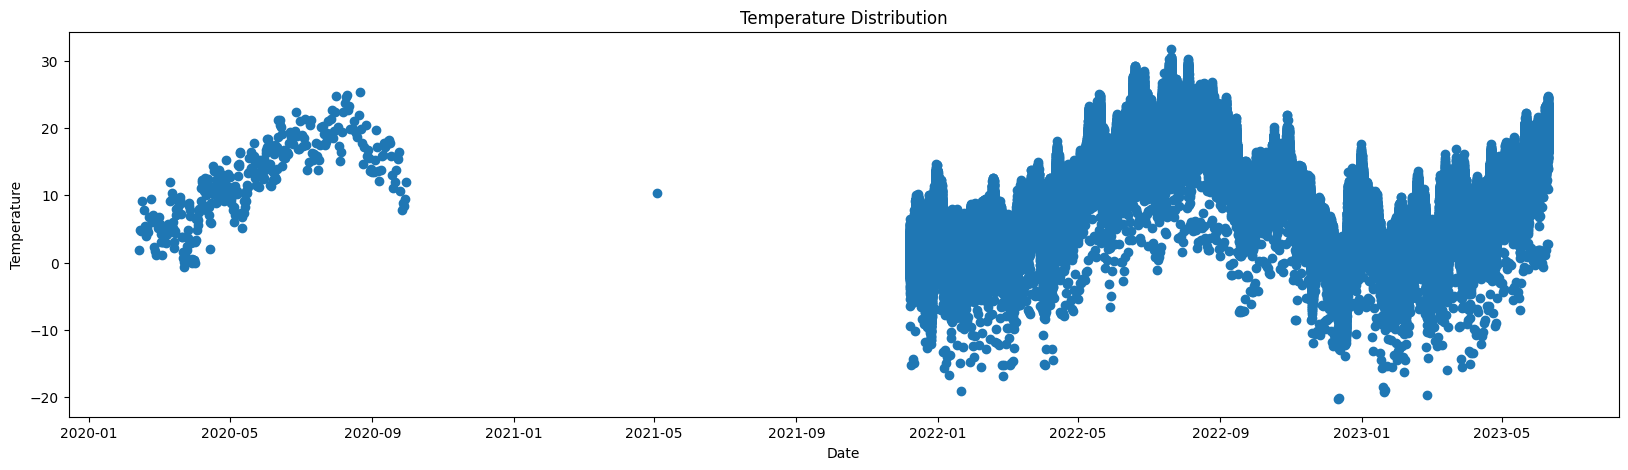

In [51]:
# px.box(merged_weather_df, x='date', y='temperature').show(renderer='vscode')
plt.figure(figsize=(20, 5))
plt.plot_date(merged_weather_df['date'], merged_weather_df['temperature'])
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Temperature Distribution")
plt.show();

In [ ]:
tmp = merged_weather_df.query("date < '2020-11' and date > '2020-06'")
print(f"Number of recorded tempretures betweent 2020-06 & 2020-11: {len(tmp)}")
print(f"Number of recorded days betweent 2020-06 & 2020-11: {len(tmp['date'].unique())}")
print(f"Number of recorded stations betweent 2020-06 & 2020-11: {tmp['station_id'].nunique()}")

Number of recorded tempretures betweent 2020-06 & 2020-11: 135
Number of recorded days betweent 2020-06 & 2020-11: 121
Number of recorded stations betweent 2020-06 & 2020-11: 2


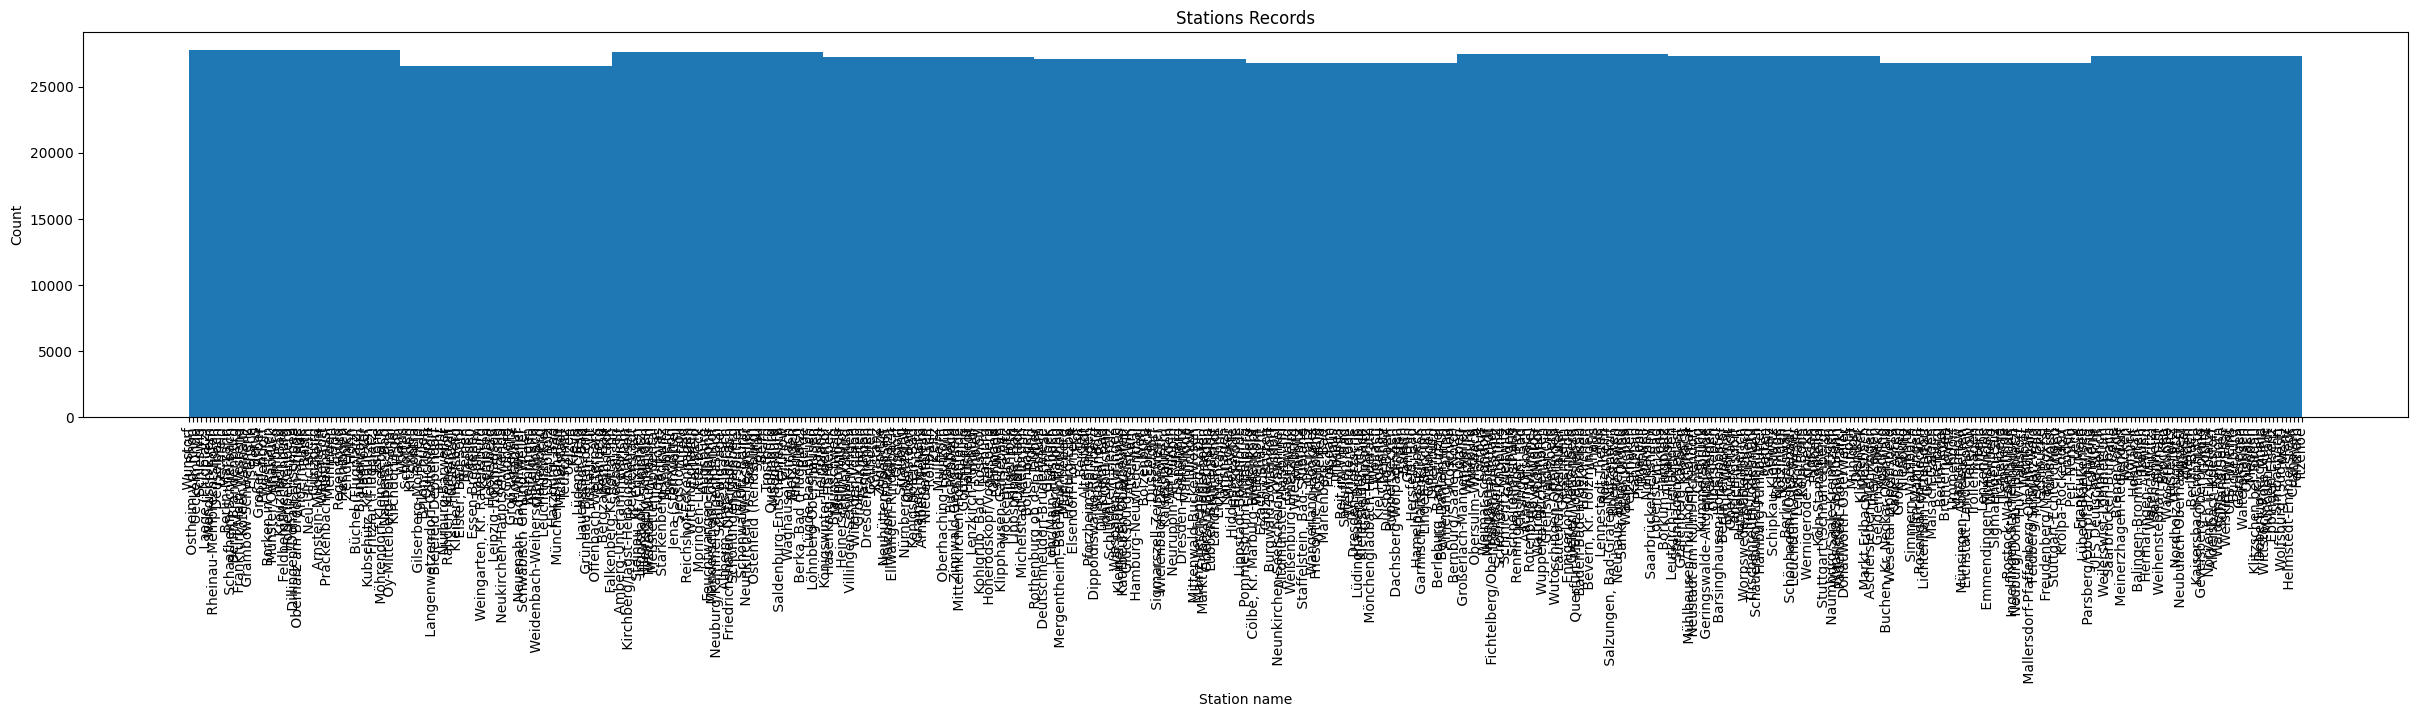

In [58]:
plt.figure(figsize=(30, 5))
plt.hist(merged_weather_df['station_name'])
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.xlabel("Station name")
plt.title("Stations Records")
plt.show()